In [1]:
import matplotlib.image as img
import numpy as np
import glob
import os
import nibabel as nib

# Load the neuroimaging data

In [2]:
X_orig = []
X_vec = []
for image_path in glob.glob("./cavum_data/*.nii.gz"):
    img=nib.load(image_path).get_data()
    X_orig.append(img)
    X_vec.append(img.flatten())

In [3]:
len(X_vec),len(X_vec[1])

(861, 75000)

We have 861 subjects with a ROI (region of interest) that contains 75000 voxels.

In [4]:
from sklearn import datasets
from pylab import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib notebook
import csv

# Load the clinical data
From here we will extract the ground truth, analyzed by professionals that has diagnosed subjects clinically.

In [41]:
import pandas as pd
esquimot=pd.read_csv('esquimot_mri.csv')

In [57]:
y_orig=esquimot['Grup']
X_qi = esquimot['QI']
X_tap = esquimot['TAP']
X_sex = esquimot['Sexe']
X_sex = pd.Categorical.from_array(X_sex).codes
y_vec = []
for i in range(len(y_orig)):
    y_vec.append(y_orig[i].split('_')[0])
#print y_vec

#impute missing values
import numbers, decimal
from numpy.random import randint
from sklearn.preprocessing import Imputer

X_qi=np.asarray(X_qi)
for i in range(len(X_qi)):
    if not isinstance(X_qi[i],numbers.Number):
        X_qi[i]=float('NaN')
print len(X_qi)
imp = Imputer(missing_values='NaN', strategy='mean',axis=1)
imp_qi = imp.fit_transform(X_qi)[0]
print len(imp_qi)
for i in range(len(X_qi)):
    imp_qi[i]=int(imp_qi[i]) 
    
X_tap = np.asarray(X_tap)    
for i in range(len(X_tap)):
    if not isinstance(X_tap[i],numbers.Number):
        X_qi[i]=float('NaN')
print len(X_tap)
imp = Imputer(missing_values='NaN', strategy='mean',axis=1)
imp_tap = imp.fit_transform(X_tap)[0]
print len(imp_tap)
for i in range(len(X_tap)):
    imp_tap[i]=int(imp_tap[i])     
    
X_clinical = [X_sex,imp_data, imp_tap]
X_clinical=np.asarray(X_clinical).T
print X_clinical

861
861
861
861
[[   0.   86.    8.]
 [   0.  100.   25.]
 [   0.   86.   22.]
 ..., 
 [   0.   95.   22.]
 [   0.   95.   22.]
 [   0.   95.   22.]]


C:\Users\alsol\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\alsol\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [58]:
col = ['r', 'g', 'b','c','y','k','m','#ff0000']
y=pd.Categorical.from_array(y_vec).codes
y_labels=pd.Categorical.from_array(y_vec).categories
print y_labels
lc = [col[i] for i in y]

Index([u'Control', u'Depressio', u'EQZ', u'FE', u'FEP', u'TBP', u'TEA', u'Tr'], dtype='object')


<IPython.core.display.Javascript object>


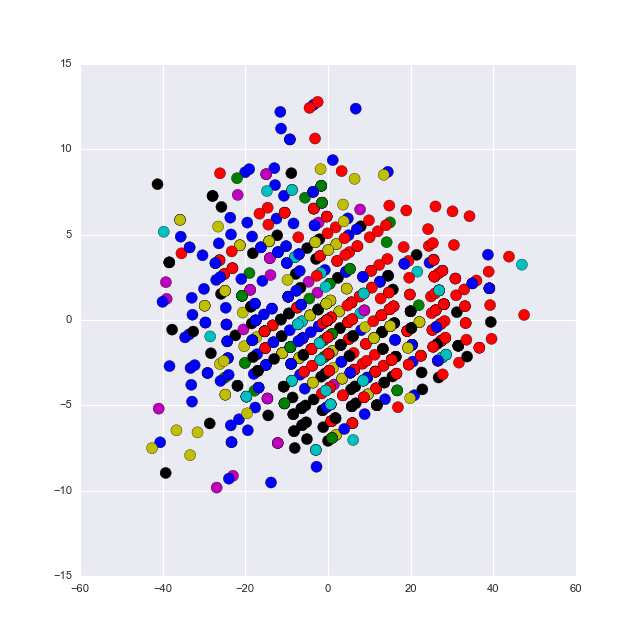

[  9.51877723e-01   4.72762044e-02   8.46073110e-04]


In [60]:
# PCA
from sklearn.decomposition import PCA,kernel_pca
pca = PCA()
fdata = pca.fit_transform(X_clinical)
fig = plt.figure(figsize=(8,8))
plt.scatter(fdata[:, 0], fdata[:, 1], c=lc,s=100)
plt.show()
print pca.explained_variance_ratio_

<IPython.core.display.Javascript object>


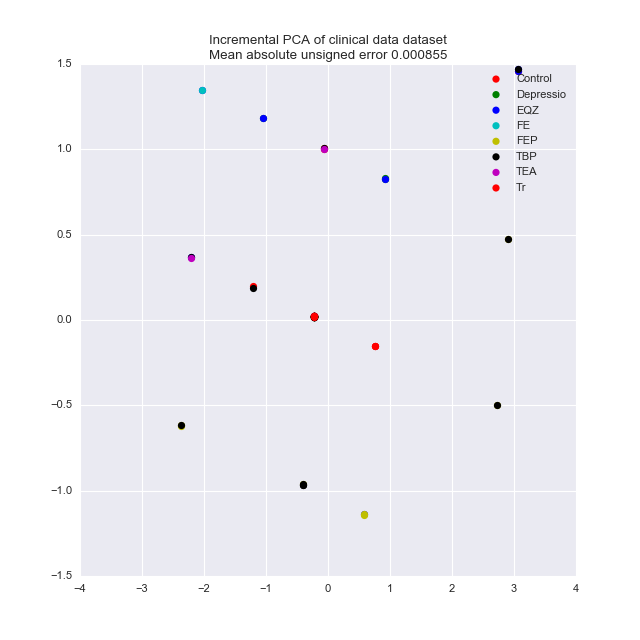

<IPython.core.display.Javascript object>


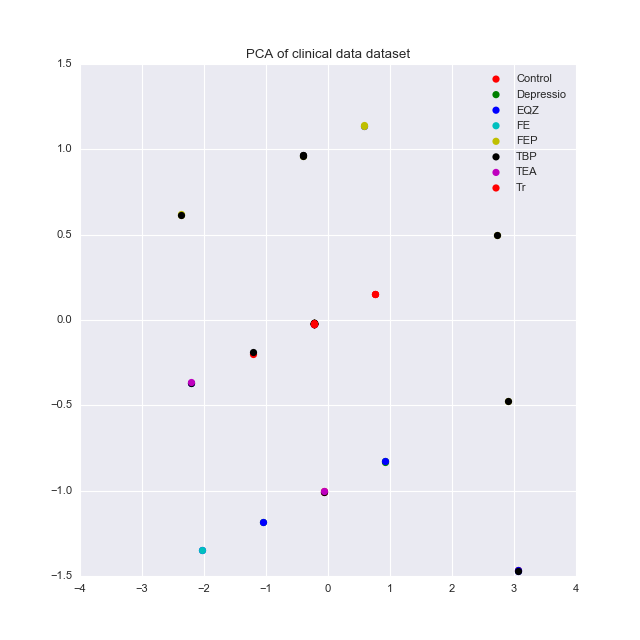

In [67]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

X = X_clinical
y = y

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['r', 'g', 'b','c','y','k','m','#ff0000']

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7], y_labels):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of clinical data dataset\nMean absolute unsigned error "
                  "%.6f" % err)
    else:
        plt.title(title + " of clinical data dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

In [69]:
X_ipca.shape

(861L, 2L)

In [70]:
X_pca.shape

(861L, 2L)

In [71]:
# importing all the required components, you may also use scikit for a direct implementation.
import copy
import math
import random
import time
import sys
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import decimal


#used for randomising U
global MAX
MAX = 1000.0
#used for end condition
global Epsilon
#Epsilon = 0.00000001
Epsilon = 0.00001
def print_matrix(list):
    """
    Prints the matrix in a more reqdable way
    """
    for i in range(0,len(list)):
        print list[i]

def end_conditon(U,U_old):
    """
    This is the end conditions, it happens when the U matrix stops chaning too much with successive iterations.
    """
    global Epsilon
    for i in range(0,len(U)):
        for j in range(0,len(U[0])):
            print U[i][j]
            if abs(U[i][j] - U_old[i][j]) > Epsilon :
                return False
    return True

def initialise_U(data, cluster_number):
    """
    This function would randomis U such that the rows add up to 1. it requires a global MAX.
    """
    global MAX
    U = []
    for i in range(0,len(data)):
        current = []
        rand_sum = 0.0
        for j in range(0,cluster_number):
            dummy = random.randint(1,int(MAX))
            current.append(dummy)
            rand_sum += dummy
        for j in range(0,cluster_number):
            current[j] = current[j] / rand_sum
        U.append(current)
    return U

def distance(point, center):
    """
    This function calculates the distance between 2 points (taken as a list). We are refering to Eucledian Distance.
    """
    if len(point) != len(center):
        return -1
    dummy = 0.0
    for i in range(0,len(point)):
        dummy += abs(point[i] - center[i]) ** 2
    return math.sqrt(dummy)

def normalise_U(U):
    """
    This de-fuzzifies the U, at the end of the clustering. It would assume that the point is a member of the cluster whoes membership is maximum.
    """
    for i in range(0,len(U)):
        maximum = max(U[i])
        for j in range(0,len(U[0])):
            if U[i][j] != maximum:
                U[i][j] = 0
            else:
                U[i][j] = 1
    return U


def FCM(data, cluster_number, m = 2):
    """
    This is the main function, it would calculate the required center, and return the final normalised membership matrix U.
    It's paramaters are the : cluster number and the fuzzifier "m".
    """
    ## initialise the U matrix:
    U = initialise_U(data, cluster_number)
    #print_matrix(U)
    #initilise the loop
    iteration_num = 0

    while (True):
        #create a copy of it, to check the end conditions
        U_old = copy.deepcopy(U)
        # cluster center vector
        C = []
        for j in range(0,cluster_number):
            current_cluster_center = []
            for i in range(0,len(data[0])): #this is the number of dimensions
                dummy_sum_num = 0.0
                dummy_sum_dum = 0.0
                for k in range(0,len(data)):
                    dummy_sum_num += (U[k][j] ** m) * data[k][i]
                    dummy_sum_dum += (U[k][j] ** m)
                current_cluster_center.append(dummy_sum_num/dummy_sum_dum)
            C.append(current_cluster_center)

        #creating a distance vector, useful in calculating the U matrix.

        distance_matrix =[]
        for i in range(0,len(data)):
            current = []
            for j in range(0,cluster_number):
                current.append(distance(data[i], C[j]))
            distance_matrix.append(current)

        # update U vector
        for j in range(0, cluster_number):
            for i in range(0, len(data)):
                dummy = 0.0
                for k in range(0,cluster_number):
                    dummy += (distance_matrix[i][j]/ distance_matrix[i][k]) ** (2/(m-1))
                U[i][j] = 1 / dummy

        if end_conditon(U,U_old):
            print "finished clustering"
            break
        i+=1
        print 'Iteration:', i
    U = normalise_U(U)
    print "normalised U"
    return U


In [62]:
from FCM2 import cmeans
X_clinical = np.asarray(X_clinical)
mcenters, u, u0, md = cmeans(X_clinical, 8, 2, error=0.005, maxiter=1000, init=None)

In [77]:
X_pca[:,0]

array([ -1.15349965e+01,   5.21355421e+00,  -9.09503249e+00,
        -1.83668618e+01,  -9.21669074e+00,  -2.58958597e+01,
        -3.84093385e+01,  -2.07980989e+01,   9.26554313e-01,
        -8.92040087e+00,   3.07022850e+00,   2.08557512e+01,
        -2.96603586e+01,  -6.31488061e+00,  -1.13603649e+01,
         5.91068679e+00,  -2.20181539e+00,  -3.24751427e+00,
        -3.92197508e+01,   4.03704873e-01,  -3.99692328e+00,
        -9.44325031e+00,  -4.06052891e+01,  -5.44381335e+00,
        -3.58034697e+01,  -2.18957257e+01,  -1.58742729e+01,
        -8.04933361e+00,  -2.43883147e+01,  -2.29940495e+01,
        -1.12383582e+01,  -2.50850988e+01,  -2.26316722e+00,
         1.14706421e+01,  -1.35563155e+01,  -1.74950976e+01,
        -9.61788193e+00,  -6.95100983e+00,   1.11220758e+01,
        -7.55622265e-01,   1.58712702e+01,  -9.09503249e+00,
        -1.10640751e+01,   2.14308770e+01,  -1.07155088e+01,
         6.37288134e+00,  -5.96631431e+00,  -5.79237964e+00,
        -3.45834877e+01,

In [86]:
# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(8):
    ax0.plot(X_pca[y == label], X_pca[y == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((X_pca[0,:], X_pca[1,:]))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    print ncenters
    mcenters, u, u0, md = cmeans(alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        print cluster_membership.shape
        ax.plot(X_pca[cluster_membership == j],
                X_pca[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in mcenters:
        ax.plot(pt[0], pt[1], 'rs')

    ax.axis('off')

fig1.tight_layout()
plt.draw()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2
(2L,)
(2L,)
3
(2L,)
(2L,)
(2L,)
4
(2L,)
(2L,)
(2L,)
(2L,)
5
(2L,)
(2L,)
(2L,)
(2L,)
(2L,)
6
(2L,)
(2L,)
(2L,)
(2L,)
(2L,)
(2L,)
7
(2L,)
(2L,)
(2L,)
(2L,)
(2L,)
(2L,)
(2L,)
8
(2L,)
(2L,)
(2L,)
(2L,)
(2L,)
(2L,)
(2L,)
(2L,)
9
(2L,)
(2L,)
(2L,)
(2L,)
(2L,)
(2L,)
(2L,)
(2L,)
(2L,)


C:\Users\alsol\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 861 but corresponding boolean dimension is 2
C:\Users\alsol\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 861 but corresponding boolean dimension is 2


IndexError: list index out of range

In [85]:
alldata[:,0]

array([-11.53499654,  12.19433305])

# Synthetic data

<IPython.core.display.Javascript object>


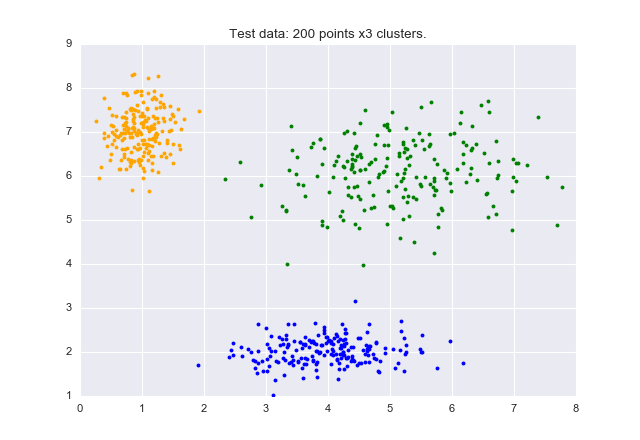

<IPython.core.display.Javascript object>


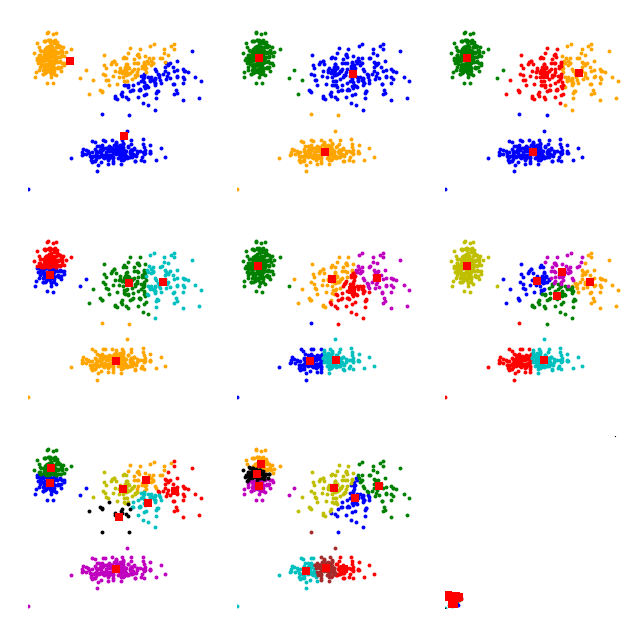

In [19]:

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.empty(1)
ypts = np.empty(1)
labels = np.empty(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):

    mcenters, u, u0, md = cmeans(alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in mcenters:
        ax.plot(pt[0], pt[1], 'rs')

    ax.axis('off')

fig1.tight_layout()
plt.draw()
plt.show()

In [25]:
X_clinical[1]

array([  86.,  100.,   86.,   78.,   88.,   70.,   58.,   75.,   96.,
         86.,   98.,  115.,   66.,   89.,   86.,  100.,   93.,   93.,
         57.,   96.,   91.,   86.,   54.,   89.,   61.,   73.,   80.,
         86.,   71.,   71.,   84.,   71.,   94.,  106.,   82.,   78.,
         86.,   88.,  106.,   nan,  111.,   86.,   84.,  117.,   84.,
        101.,   89.,   89.,   61.,   71.,   75.,   88.,   80.,   84.,
        103.,   80.,   88.,  115.,  100.,   69.,   86.,   61.,   88.,
        110.,   nan,  108.,  126.,   88.,   78.,   nan,   82.,   nan,
         86.,  103.,   73.,   91.,  106.,   73.,   88.,   93.,  130.,
         54.,   91.,  121.,   88.,   94.,   86.,   nan,  100.,   70.,
        122.,   67.,   98.,   nan,  103.,  115.,   88.,  108.,   93.,
         63.,  110.,   80.,   89.,   84.,   86.,   89.,  101.,   77.,
        110.,   80.,   75.,   73.,   nan,   88.,   91.,   73.,  111.,
        108.,   80.,   82.,   80.,   nan,   84.,  100.,   86.,   nan,
        123.,   71.,

The first two components doesn't give any visual signifiance on the two first components, let's check how many components are needed to reach the 95% of variance

In [13]:
significative_pca=pca.explained_variance_ratio_[0:81]
print 'Variance per component:',pca.explained_variance_ratio_[0:10] 
print 'Number of variables: ',len(significative_pca), ' Variance explained: ',np.sum(significative_pca) 

Variance per component: [ 0.53294277  0.08292768  0.06242615  0.03594273  0.03158487  0.02561469
  0.01708217  0.01236525  0.01091572  0.00946956]
Number of variables:  81  Variance explained:  0.950373


As we can see, in order to reach the 95% of variance from the data, we need 81 components from the PCA.

# Fuzzy clustering - Fuzzy C-means

In [14]:
from FCM import fuzzy
fcm = fuzzy(fdata,8)

ImportError: cannot import name fuzzy

In [ ]:
# Give a try only with

<IPython.core.display.Javascript object>


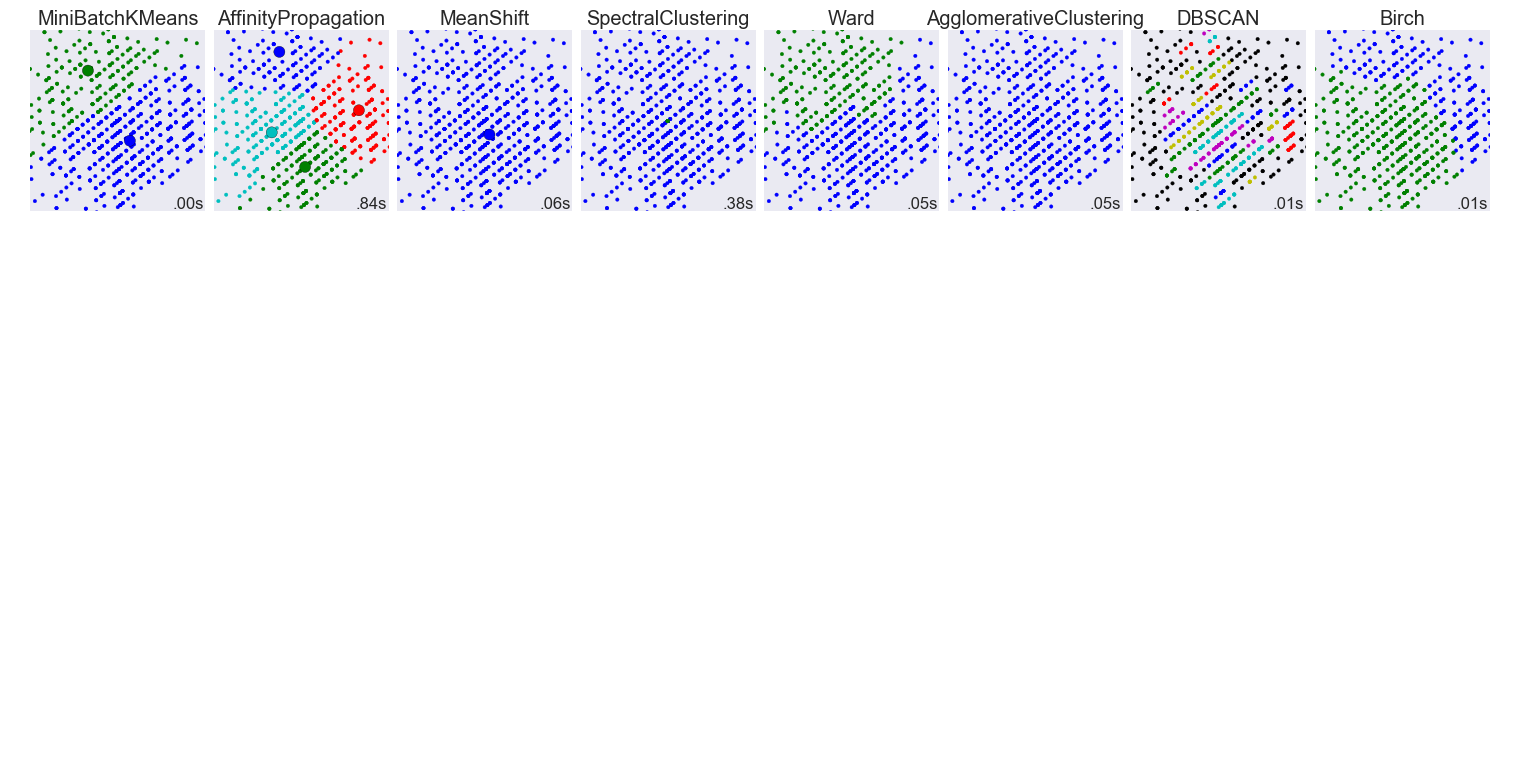

In [93]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

clustering_names = [
    'MiniBatchKMeans', 'AffinityPropagation', 'MeanShift',
    'SpectralClustering', 'Ward', 'AgglomerativeClustering',
    'DBSCAN', 'Birch']

plt.figure(figsize=(len(clustering_names) * 2+3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

data=X_pca,y

#datasets = [noisy_circles, noisy_moons, blobs, no_structure]

datasets = [data]
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # create clustering estimators
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=2)
    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward',
                                           connectivity=connectivity)
    spectral = cluster.SpectralClustering(n_clusters=2,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=.2)
    affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                       preference=-200)

    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock", n_clusters=2,
        connectivity=connectivity)

    birch = cluster.Birch(n_clusters=2)
    clustering_algorithms = [
        two_means, affinity_propagation, ms, spectral, ward, average_linkage,
        dbscan, birch]

    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

In [ ]:
ff=X_pca,y